<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 다룰 내용

- SVM 알고리즘을 이해합니다.

# 1.환경준비

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

* SVM 모델을 시각화 하는 함수를 만듭니다.

In [3]:
def svm_visualize(x, y, model, title=''):
    
    xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 50), 
                         np.linspace(x[:, 1].min(), x[:, 1].max(), 50))

    # 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 그래프 그리기
    plt.figure(figsize=(5, 5))

    # 데이터 산점도
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

    # levels 0은 모델, -1, 1은 마진 경계
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], 
                colors=['gray', 'red', 'gray'],
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.axis('tight')
    plt.show()

# 2.SVM 기본 개념

- SVM 모델의 기본 개념을 이해합니다.

**1) 데이터 만들고 시각화**

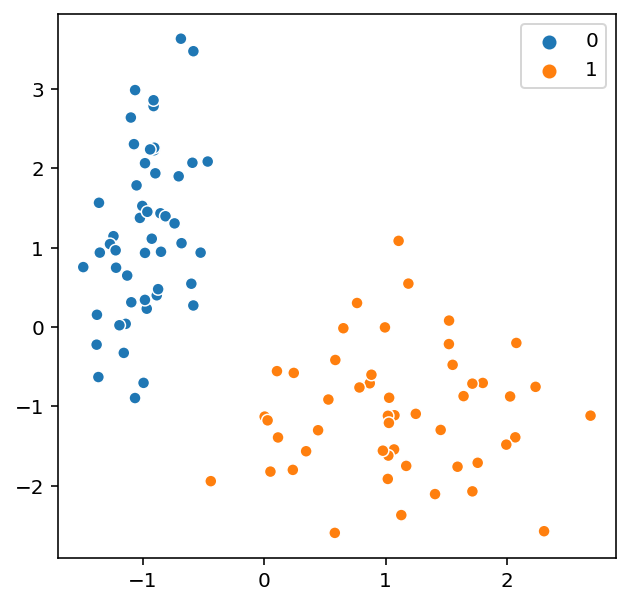

In [4]:
# 데이터 만들기
from sklearn.datasets import make_moons, make_classification

seed = 903
x, y = make_classification(n_samples=100,
                           n_features=2, 
                           n_redundant=0, 
                           weights=[0.5, 0.5],
                           n_clusters_per_class=1, 
                           random_state=seed)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) 모델링 후 시각화**

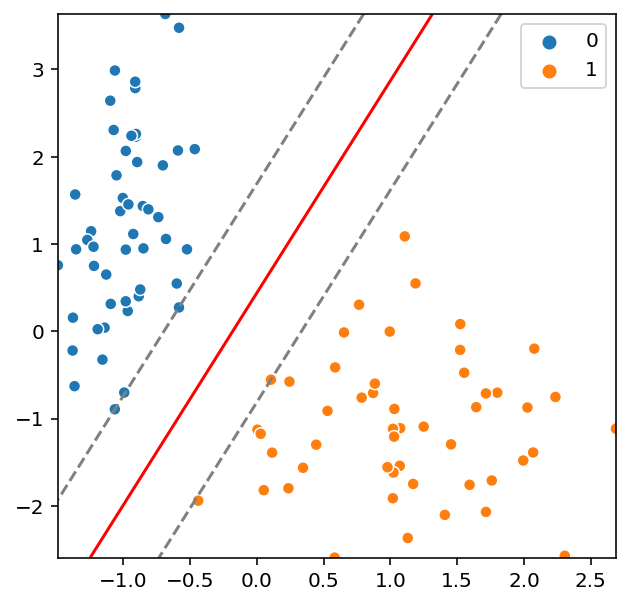

In [9]:
# 불러오기
from sklearn.svm import SVC

# 모델링
model = SVC(kernel='linear', C=10)
model.fit(x, y)

# 시각화
svm_visualize(x, y, model)

# 3.결정 경계와 마진 이해

**1) 데이터 만들고 시각화**

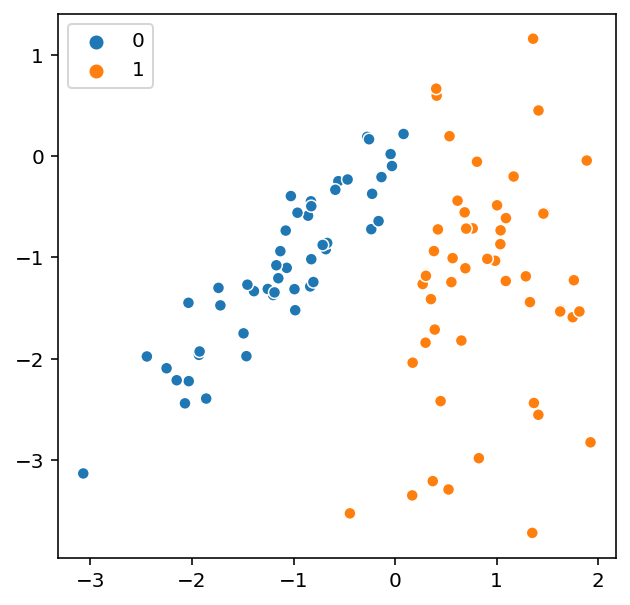

In [10]:
# 데이터 만들기
seed = 874
x, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           weights=[0.5, 0.5],
                           n_clusters_per_class=1, 
                           random_state=seed)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) cost 값 변경**

* cost 값을 0.1, ~ 40 사이의 숫자로 변경하면서 cost에 따른 모델을 살펴 봅니다.

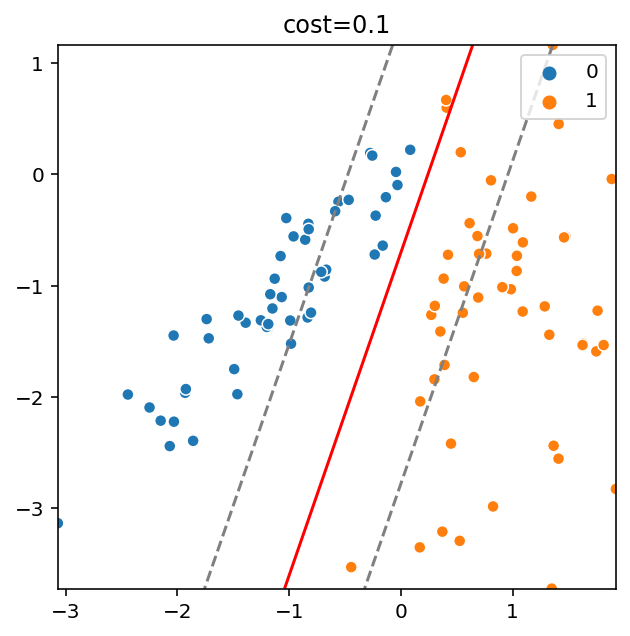

In [11]:
# cost 값
cost = 0.1

# 모델링
model = SVC(kernel='linear', C=cost)
model.fit(x, y)

# 시각화
svm_visualize(x, y, model, f'cost={cost}')

# 4.선형경계로 분류할 수 없는 경우

**1) 데이터 만들고 시각화**

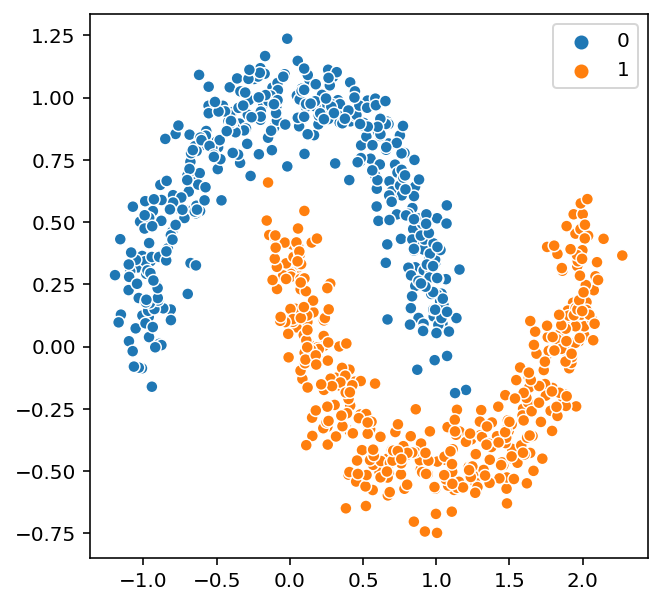

In [12]:
# 데이터 반들기
x, y = make_moons(n_samples=800, noise=.1, random_state=10)

# 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

**2) 선형경계로 분류**

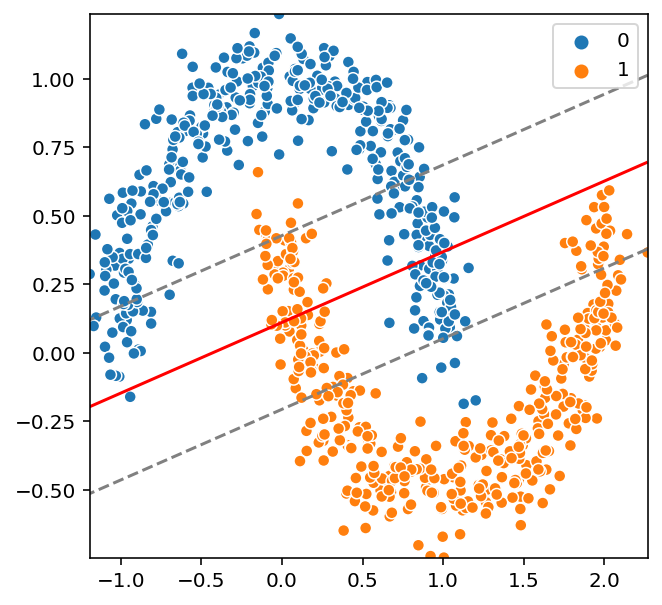

In [13]:
# 모델링
model = SVC(kernel='linear')
model.fit(x, y)

# 시각화
svm_visualize(x, y, model)

**3) 커널 트릭 사용: poly**

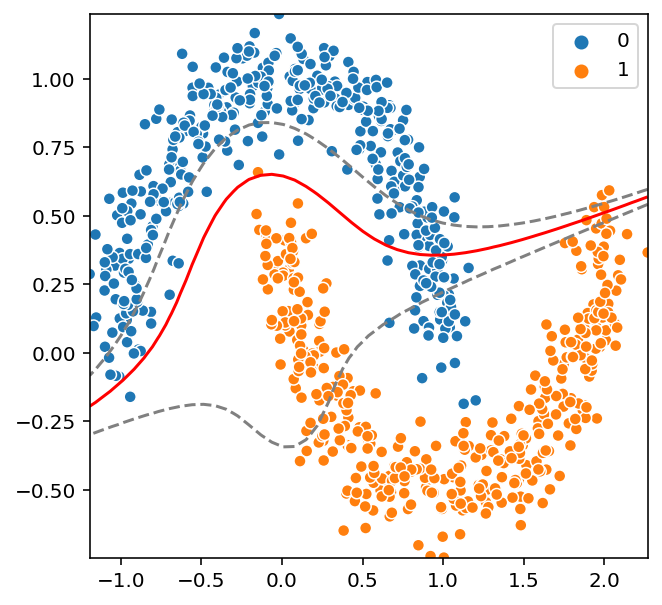

In [14]:
# 모델링
model = SVC(kernel='poly', C=1)
model.fit(x, y)

# 시각화
svm_visualize(x, y, model)

**4) 커널 트릭 사용 : rbf**

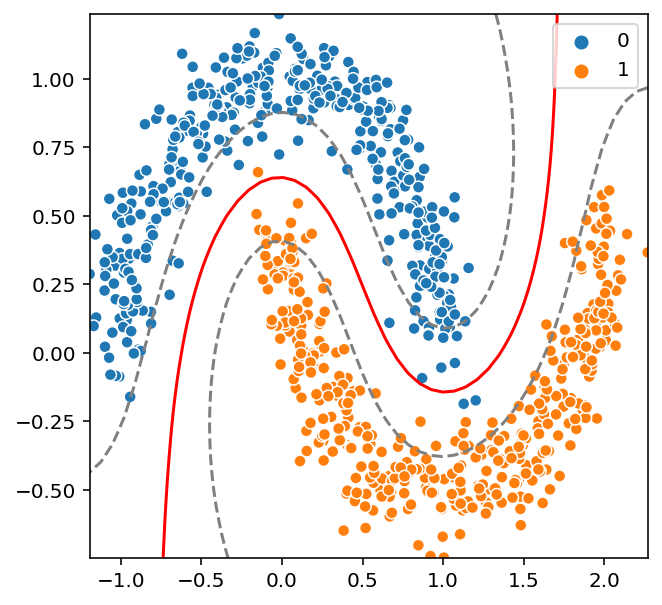

In [15]:
# 모델링
model = SVC(kernel='rbf', C=1)
model.fit(x, y)

# 시각화
svm_visualize(x, y, model)

# 5. 하이퍼파라미터

* cost
    - 오류를 허용하지 않으려는 비용(노력!)입니다.
    - 값이 클수록 오류를 허용하지 않기 위한 경계를 만들려고 합니다.
* gamma 
    - 결정 경계의 곡률입니다.
    - 값이 클수록 곡률 반경이 작아집니다.

**1) cost에 따른 결정 경계**

- cost에 따라 결정 경계가 어떻게 달라지는지 살펴 봅니다.

In [ ]:
# cost에 따른 결정 경계
for cost in [0.1, .5, 2, 20]: 
    model = SVC(kernel='rbf', C=cost)
    model.fit(x, y)
    svm_visualize(x, y, model, f'cost={cost}')

**2) gamma에 따른 결정 경계**

- gamma에 따라 결정 경계가 어떻게 달라지는지 살펴 봅니다.

In [ ]:
# gamma에 따흔 결정 경계
for g in [.5, 1, 5, 20]: 
    model = SVC(kernel='rbf', C=2, gamma=g)
    model.fit(x, y)
    svm_visualize(x, y, model, f'gamma={g}')